# Binary classification task
In this notebook, we will use the clean dataset to evaluate the accuracy of different classifiers in predicting the survival of the passengers based on the considered features. We will use the standard libraries from scikit-learn.

## The datasets
For this project, we do not have the ground truth for the test set, so we will use only the training set for the evaluation. The first step is to import the clean data and the target labels. The train data should be provided as a matrix (numpy array) with dimensions $n_{samples} \times n_{features}$, and the targets are a binary vector of size $n_{samples}$.

In [11]:
import matplotlib.pyplot as pl
import numpy as np

train_data = np.load('cleantraindata.npy')
target_labels = np.load('target_train.npy')

## The classifiers
There are lots of different models that can be used to solve this problem. This should be instructed by the structure of the dataset and the characteristics of the features considered. 
Alternatively (or additionally), it is always helpful (if computing resources allow it) to do a brute-force search, where we compare the accuracy of a large number of applicable models. 
We will use this option since the dataset is rather small ($n_{samples}=891$, $n_{features}=7$) and apply the following classifiers (see e.g. [binary classification](https://en.wikipedia.org/wiki/Binary_classification)):

* Logistic Regression
* Decision Trees
* Support Vector Machines 
* Linear and Quadratic Discriminant Analysis
* Random Forest 
* K-Nearest Neighbors
* Naive Bayes 
* Artificial Neural Networks - multi-layer perceptron

All of these models have a standard implementation in scikit-learn. Let's import all the relevant models:

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

We start by initializing all the classifiers. The results can be very sensitive to the initialization parameters and, for each specific model, results can be improved by these choices. Additionally, some models can use some preliminary hyper-parameter tuning (e.g. nonlinear SVM), which can be done by grid-search and cross-validation.
For simplicity, we will use standard parameters:

In [13]:
classifiers = [
    LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr'), 
    DecisionTreeClassifier(max_depth=5),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    KNeighborsClassifier(3),
    GaussianNB(),
    MLPClassifier(alpha=1, max_iter=1000),
]

classifier_names = [
    "Logistic Regression", 
    "Decision Tree", 
    "Linear SVM", 
    "Nonlinear SVM", 
    "Linear Discriminant Analysis", 
    "Quadratic Discriminant Analysis", 
    "Random Forest", 
    "K-Nearest Neighbors", 
    "Gaussian Naive Bayes",
    "Multi-Layer Perceptron"
]

For this example, until the original dataset is ready, we will use a synthetic dataset generated in sklearn, with the same number of samples and features to serve as an example. 

In [14]:
#from sklearn.datasets import make_classification
#train_data, target_labels = make_classification(n_samples=891, n_features=7)
#print(train_data.shape, target_labels.shape)

Now, we iterate the classifiers, train and evaluate them systematically.

In [15]:
from sklearn.model_selection import cross_validate

classifier_scores = []
classifier_error = []
for clf, clf_id in zip(classifiers, classifier_names):
    cv_results = cross_validate(clf, train_data, target_labels, cv=10)
    score = np.mean(cv_results['test_score'])  #this would normally be done on the test set!
    score_err = np.std(cv_results['test_score'])
    print(clf_id, score)
    classifier_scores.append(score)
    classifier_error.append(score_err)

Logistic Regression 0.7935413119963682
Decision Tree 0.8081857904891612
Linear SVM 0.7855870502780616
Nonlinear SVM 0.6474804221995233
Linear Discriminant Analysis 0.7912683009874021
Quadratic Discriminant Analysis 0.800283168766315
Random Forest 0.8048901940755873
K-Nearest Neighbors 0.7274605606628078
Gaussian Naive Bayes 0.7857507660878447
Multi-Layer Perceptron 0.696109976166156


## Results

[Text(0, 0, 'Logistic Regression'),
 Text(0, 0, 'Decision Tree'),
 Text(0, 0, 'Linear SVM'),
 Text(0, 0, 'Nonlinear SVM'),
 Text(0, 0, 'Linear Discriminant Analysis'),
 Text(0, 0, 'Quadratic Discriminant Analysis'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'K-Nearest Neighbors'),
 Text(0, 0, 'Gaussian Naive Bayes'),
 Text(0, 0, 'Multi-Layer Perceptron')]

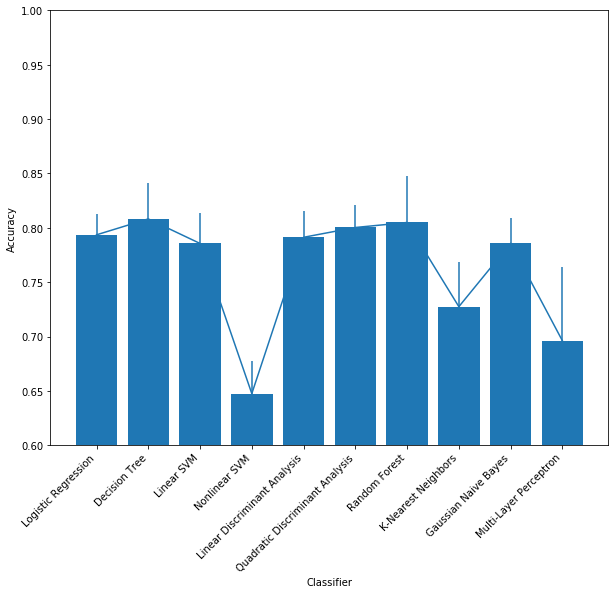

In [16]:
fig = pl.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.bar(np.arange(0, len(classifiers)), height=classifier_scores, align='center')
ax.errorbar(np.arange(0, len(classifiers)), y=classifier_scores, yerr=classifier_error, fmt='')
ax.set_ylim([0.6, 1.])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Classifier')
ax.set_xticks(np.arange(0, len(classifiers)))
ax.set_xticklabels(classifier_names, rotation = 45, ha="right")